## 당뇨병 수치를 맞춰보자!

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt

### (1) 데이터 가져오기

In [2]:
#(1)데이터 가져오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

### (2) 모델에 입력할 데이터 X 준비하기

In [3]:
#(2)모델에 입력할 데이터 X 구하기
# X = np.array(df_X)

### (3) 모델에 입력할 데이터 y 준비하기

In [4]:
#(3)모델에 입력할 데이터 y 구하기
# y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기

In [5]:
#(4)train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기

In [6]:
#(5)모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

In [7]:
#(6) 손실함수 loss정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7)기울기를 구하는 gradient 함수 구현하기

In [8]:
#(7)기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
#그냥 프린트

### (8)하이퍼 파라미터인 학습률 설정하기

In [9]:
#(8)하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.01

### (9)모델 학습하기

In [10]:
#(9)모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 20872.0730
Iteration 20 : Loss 15502.2808
Iteration 30 : Loss 11877.0542
Iteration 40 : Loss 9419.2485
Iteration 50 : Loss 7743.5408
Iteration 60 : Loss 6592.6023
Iteration 70 : Loss 5794.5109
Iteration 80 : Loss 5234.3386
Iteration 90 : Loss 4835.1958
Iteration 100 : Loss 4545.5840
Iteration 110 : Loss 4330.9587
Iteration 120 : Loss 4168.1005
Iteration 130 : Loss 4041.3591
Iteration 140 : Loss 3940.1474
Iteration 150 : Loss 3857.2685
Iteration 160 : Loss 3787.7997
Iteration 170 : Loss 3728.3463
Iteration 180 : Loss 3676.5438
Iteration 190 : Loss 3630.7246
Iteration 200 : Loss 3589.6946
Iteration 210 : Loss 3552.5841
Iteration 220 : Loss 3518.7467
Iteration 230 : Loss 3487.6920
Iteration 240 : Loss 3459.0396
Iteration 250 : Loss 3432.4877
Iteration 260 : Loss 3407.7922
Iteration 270 : Loss 3384.7514
Iteration 280 : Loss 3363.1962
Iteration 290 : Loss 3342.9826
Iteration 300 : Loss 3323.9864
Iteration 310 : Loss 3306.0995
Iteration 320 : Loss 3289.2270
Iteration 330 

### (10) test 데이터에 대한 성능 확인

In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2867.150791960273

### (11) 정답 데이터와 예측한 데이터 시각화하기

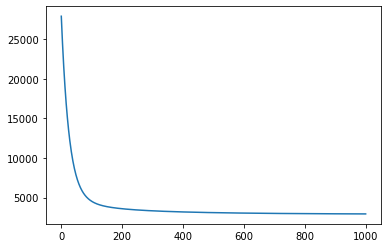

In [12]:


plt.plot(losses)
plt.show()

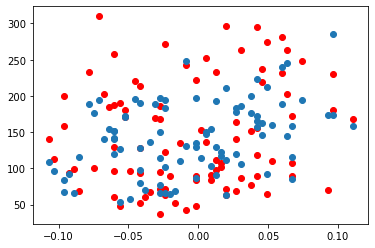

In [13]:
plt.scatter(X_test[:, 0], y_test, label="true", color = 'red')
plt.scatter(X_test[:, 0], prediction)
plt.show()

모델에 대한 코드는 lms에 그대로 쓸 수 있게 준비되어 있어서 수월했지만 데이터를 준비하는 과정은 처음에는 조금 방황했다. 이전 수업에서 나왔던 내용들이기 때문에 차분하게 하나씩 해결했다. 아직 제대로 했는지에 대한 확신은 없다. DESCR을 이용해 독립변수가 10개라는 사실을 알아내고, W = np.random.rand(10) 코드에 넣었다. 처음에는 2800대의 loss를 보고 잘못 한 줄 알고 다른 조의 결과를 보고 다녔는데 모두 이렇게 나왔다.

## 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [14]:
#(1)데이터 가져오기
import pandas as pd
import numpy as np
import datetime

train = pd.read_csv('~/aiffel/train.csv')
train.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

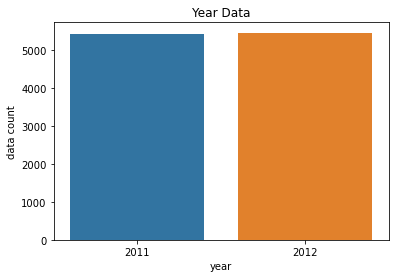

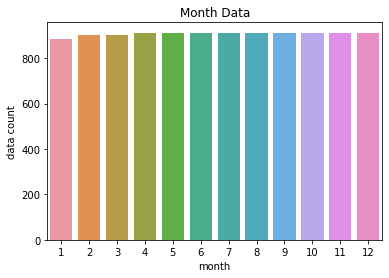

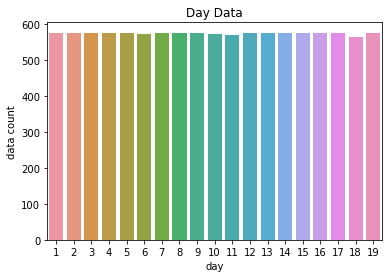

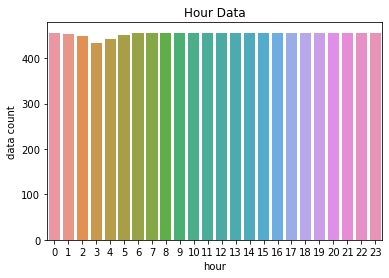

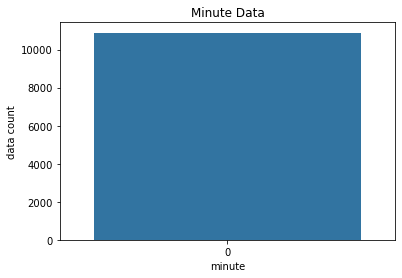

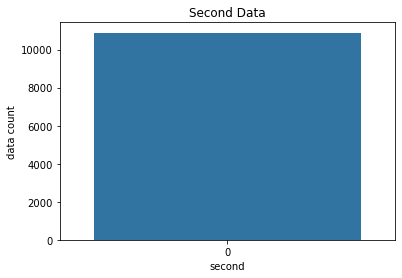

In [16]:
#(3)year, month, day, hour, minute, second 데이터 개수 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

ax1 = plt.subplots()
ax1 = sns.countplot('year', data=train)
ax1.set_title('Year Data')
ax1.set_xlabel('year')
ax1.set_ylabel('data count')

plt.show()

ax2 = plt.subplots()
ax2 = sns.countplot('month', data=train)
ax2.set_title('Month Data')
ax2.set_xlabel('month')
ax2.set_ylabel('data count')

plt.show()

ax3 = plt.subplots()
ax3 = sns.countplot('day', data=train)
ax3.set_title('Day Data')
ax3.set_xlabel('day')
ax3.set_ylabel('data count')

plt.show()

ax4 = plt.subplots()
ax4 = sns.countplot('hour', data=train)
ax4.set_title('Hour Data')
ax4.set_xlabel('hour')
ax4.set_ylabel('data count')

plt.show()

ax5 = plt.subplots()
ax5 = sns.countplot('minute', data=train)
ax5.set_title('Minute Data')
ax5.set_xlabel('minute')
ax5.set_ylabel('data count')

plt.show()

ax6 = plt.subplots()
ax6 = sns.countplot('second', data=train)
ax6.set_title('Second Data')
ax6.set_xlabel('second')
ax6.set_ylabel('data count')

plt.show()

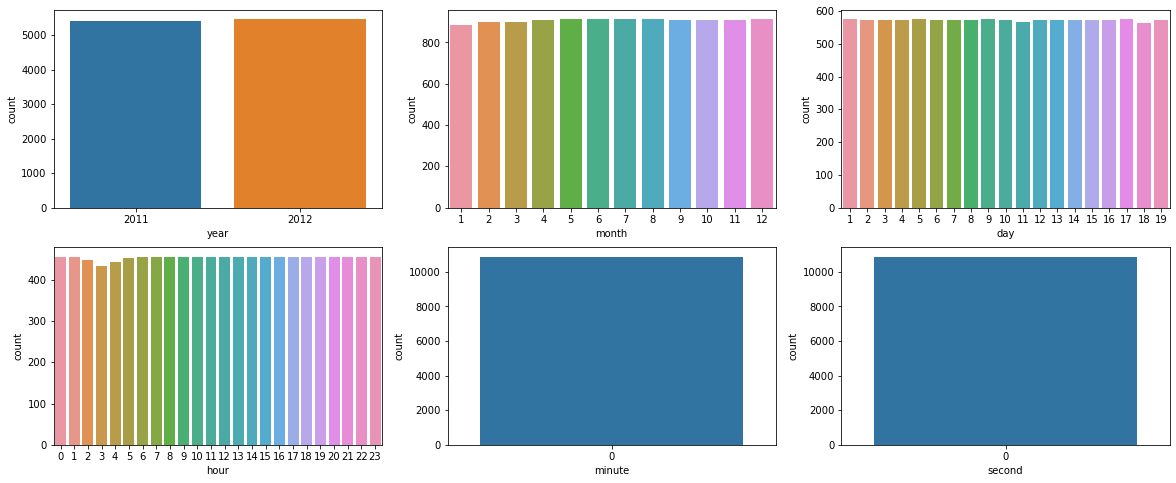

In [17]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(20,8)
sns.countplot(data=train, x='year', ax=ax1)
sns.countplot(data=train, x='month', ax=ax2)
sns.countplot(data=train, x='day', ax=ax3)
sns.countplot(data=train, x='hour', ax=ax4)
sns.countplot(data=train, x='minute', ax=ax5)
sns.countplot(data=train, x='second', ax=ax6)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [20]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual', 'year', 'month', 'day', 'hour']].values
y = train[['count']].values
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

(8708, 14) (8708, 1)
(2178, 14) (2178, 1)


LinearRegression()

In [22]:
predictions = model.predict(X_test)
predictions

array([[127.],
       [ 13.],
       [163.],
       ...,
       [509.],
       [  5.],
       [239.]])

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse =mean_squared_error(y_test, predictions, squared=False) 

print('mse = ', mse)
print('rmse = ', rmse)

mse =  1.327403090516113e-25
rmse =  3.643354348009692e-13


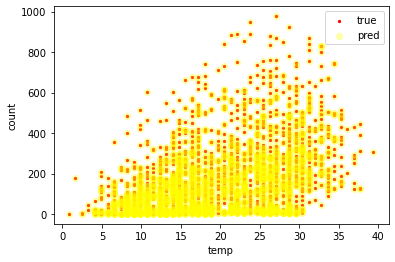

In [24]:
plt.scatter(X_test[:, 4], y_test, label="true", color = 'red', s = 5)
plt.scatter(X_test[:, 4], predictions, label="pred", color = 'yellow', alpha = 0.3)
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

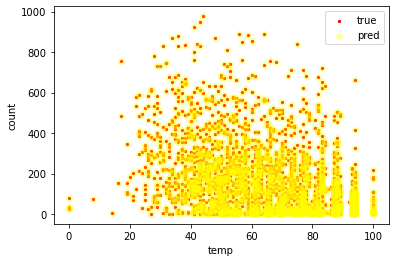

In [25]:
plt.scatter(X_test[:, 6], y_test, label="true", color = 'red', s = 5)
plt.scatter(X_test[:, 6], predictions, label="pred", color = 'yellow', alpha = 0.3)
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

프로젝트1에 비하면 2배 넘게 시간이 걸리고 어려웠다. 매번이 고비였다. 슬슬 해당 노드에 나온 코드로만 해결이 불가능한 상황이었다. (2)컬럼 자료형 변환, 컬럼 생성은 구글링을 통해서 해결하고 나중에 더 짧은 코드가 있다는 조원의 조언으로 바꾸었다. (3)은 처음에는 문제를 이해 못해서 여섯 개를 한 개씩 나열해보고 나중에 6개 그래프를 함께 시각화해야하는 것이라고 생각했는데, 그냥 후자만 하면 되는 것 같았다. 그래도 아까워서 안 지웠다. subplot 구글링을 했을 때 방법은 여러가지 있었는데 이게 제일 짧고 이해하기 편해서 선택했다. (4)도 처음에 문장을 이해 못했다. 이런 방식의 행동은 낯설었기에 이 부분은 처음부터 조원의 도움을 받았다. x = [].values 라는 구조로 작성하면 된다는 사실을 접하고 이것저것 넣어보다가(분이랑 초는 0이라서 뺐다)(7)에서 그래프가 일직선으로만 표기됐다. 그래서 다시 위로 올라와 이것저것 바꾸다가 year, month, day, hour 이것들이 앞에 있어서 그랬다는 사실을 알게 되고 뒤로 뺐다.
돌이켜보면 (3),(4)에서 시간이 제일 걸렸다. 아직까지는 아 이거 어떤 노드에서 배웠는데, 어떻게 하더라? 상태이다.